Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 573ms/step - acc: 0.5573 - loss: 0.6919 - val_acc: 0.5033 - val_loss: 0.6935
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 450ms/step - acc: 0.9602 - loss: 0.5589 - val_acc: 0.5097 - val_loss: 0.6967
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 440ms/step - acc: 0.9939 - loss: 0.4209 - val_acc: 0.5085 - val_loss: 0.7063
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 444ms/step - acc: 0.9753 - loss: 0.2980 - val_acc: 0.5160 - val_loss: 0.7312
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 445ms/step - acc: 0.9785 - loss: 0.2176 - val_acc: 0.5093 - val_loss: 0.7236
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 433ms/step - acc: 1.0000 - loss: 0.1384 - val_acc: 0.5156 - val_loss: 0.7255
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 424ms/step - acc: 1.0000 - loss: 0.0946 - val_acc: 0.5064 - val_loss: 0.7447
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 878ms/step - acc: 1.0000 - loss: 0.0615 - val_acc: 0.5121 - val_loss: 0.7291
Epoch 9/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 699ms/step - acc: 1.0000 - loss: 

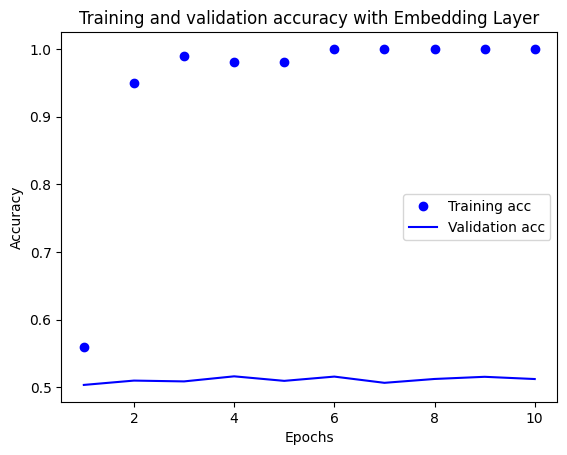

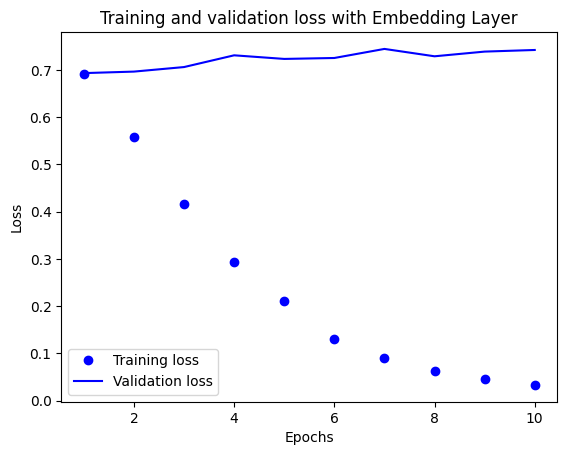

[GloVe] Found: glove.6B/glove.6B.100d.txt
Loaded 400000 GloVe word vectors.
Model with pretrained GloVe embedding is ready.
Epoch 1/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 337s 533ms/step - acc: 0.7036 - loss: 0.5489 - val_acc: 0.8512 - val_loss: 0.3562
Epoch 2/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 344s 549ms/step - acc: 0.8836 - loss: 0.2986 - val_acc: 0.8578 - val_loss: 0.3443
Epoch 3/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 332s 531ms/step - acc: 0.9307 - loss: 0.1995 - val_acc: 0.8496 - val_loss: 0.3828
Epoch 4/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 381s 531ms/step - acc: 0.9513 - loss: 0.1389 - val_acc: 0.8380 - val_loss: 0.5077
Epoch 5/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 355s 568ms/step - acc: 0.9671 - loss: 0.1032 - val_acc: 0.8320 - val_loss: 0.5268
Epoch 6/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 367s 544ms/step - acc: 0.9772 - loss: 0.0721 - val_acc: 0.8470 - val_loss: 0.5511
Epoch 7/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 331s 530ms/step - acc: 0.9837 - loss: 0.0502 - val_acc: 0.8338 - val_loss: 0.6166
Epoch 8/15
625/625 ━━━

In [4]:
import numpy as np
import os
import zipfile
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import imdb
from tensorflow.keras import preprocessing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Embedding
from tensorflow.keras.optimizers import RMSprop


max_features = 10000
maxlen = 150
batch_size = 32
embedding_dim = 100

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=max_features)

word_index = imdb.get_word_index()
reverse_word_index = {value: key for (key, value) in word_index.items()}
decoded_review = ' '.join(reverse_word_index.get(i - 3, '?') for i in train_data[0])

train_data = preprocessing.sequence.pad_sequences(train_data, maxlen=maxlen)
test_data = preprocessing.sequence.pad_sequences(test_data, maxlen=maxlen)

training_samples = 100
x_train = train_data[:training_samples]
y_train = train_labels[:training_samples]

x_val = train_data[training_samples: training_samples + 10000]
y_val = train_labels[training_samples: training_samples + 10000]


model_embedding = Sequential()
model_embedding.add(Embedding(max_features, embedding_dim, input_length=maxlen))
model_embedding.add(Flatten())
model_embedding.add(Dense(32, activation='relu'))
model_embedding.add(Dense(1, activation='sigmoid'))

model_embedding.compile(
    optimizer='rmsprop',
    loss='binary_crossentropy',
    metrics=['acc']
)

history_embedding = model_embedding.fit(
    x_train, y_train,
    epochs=10,
    batch_size=batch_size,
    validation_data=(x_val, y_val)
)

acc = history_embedding.history['acc']
val_acc = history_embedding.history['val_acc']
loss = history_embedding.history['loss']
val_loss = history_embedding.history['val_loss']
epochs = range(1, len(acc) + 1)


plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy with Embedding Layer')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss with Embedding Layer')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


GLOVE_DIR = "glove.6B"
GLOVE_ZIP = os.path.join(GLOVE_DIR, "glove.6B.zip")
GLOVE_FILE = os.path.join(GLOVE_DIR, "glove.6B.100d.txt")
GLOVE_URL = "http://nlp.stanford.edu/data/glove.6B.zip"


def ensure_glove_available():
    os.makedirs(GLOVE_DIR, exist_ok=True)

    if os.path.exists(GLOVE_FILE):
        print("[GloVe] Found:", GLOVE_FILE)
        return True

    try:
        import urllib.request
        print(f"[GloVe] Downloading {GLOVE_URL} ...")
        urllib.request.urlretrieve(GLOVE_URL, GLOVE_ZIP)

        print("[GloVe] Extracting...")
        with zipfile.ZipFile(GLOVE_ZIP, "r") as z:
            z.extractall(GLOVE_DIR)

        ok = os.path.exists(GLOVE_FILE)
        print("[GloVe] Ready:", GLOVE_FILE if ok else "[GloVe] Missing after extraction")
        return ok

    except Exception as e:
        print("[GloVe] Download failed:", e)
        print("       Place glove.6B.100d.txt manually inside:", GLOVE_DIR)
        return os.path.exists(GLOVE_FILE)


ensure_glove_available()

embeddings_index = {}

with open(GLOVE_FILE, encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs

print(f"Loaded {len(embeddings_index)} GloVe word vectors.")



embedding_matrix = np.zeros((max_features, embedding_dim))
for word, i in word_index.items():
    if i < max_features:
        vec = embeddings_index.get(word)
        if vec is not None:
            embedding_matrix[i] = vec

model_pretrained_embedding = Sequential()
model_pretrained_embedding.add(
    Embedding(
        input_dim=max_features,
        output_dim=embedding_dim,
        input_length=maxlen,
        weights=[embedding_matrix],
        trainable=False
    )
)
model_pretrained_embedding.add(Flatten())
model_pretrained_embedding.add(Dense(32, activation='relu'))
model_pretrained_embedding.add(Dense(1, activation='sigmoid'))

model_pretrained_embedding.compile(
    optimizer='rmsprop',
    loss='binary_crossentropy',
    metrics=['acc']
)

print("Model with pretrained GloVe embedding is ready.")

import numpy as np
from tensorflow.keras.datasets import imdb
from tensorflow.keras import preprocessing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense, LSTM, Dropout
from sklearn.metrics import accuracy_score


max_features = 10000
maxlen = 150
embedding_dim = 100
batch_size = 32
epochs = 10


(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=max_features)


x_train = preprocessing.sequence.pad_sequences(train_data, maxlen=maxlen)
x_test = preprocessing.sequence.pad_sequences(test_data, maxlen=maxlen)


model_embedding = Sequential()
model_embedding.add(Embedding(max_features, embedding_dim, input_length=maxlen))
model_embedding.add(LSTM(128, return_sequences=True))
model_embedding.add(LSTM(128))
model_embedding.add(Dense(64, activation='relu'))
model_embedding.add(Dropout(0.5))
model_embedding.add(Dense(1, activation='sigmoid'))


model_embedding.compile(optimizer='adam',
                        loss='binary_crossentropy',
                        metrics=['acc'])


history_embedding = model_embedding.fit(x_train, train_labels,
                                        epochs=epochs,
                                        batch_size=batch_size,
                                        validation_split=0.2,
                                        verbose=1)

loss, accuracy = model_embedding.evaluate(x_test, test_labels)
print(f"Test Accuracy: {accuracy * 100:.2f}%")